____
#### 1. Pandas 간단 소개 
   + 데아타 분석시 전처리용으로 짱인 효녀 패키지
____

In [1]:
from matplotlib import pyplot as plt
import matplotlib as mpl


# mpl에서 데이타 시각화시 한글깨짐 현상과 x,y 축에 마이너스 안보이는 현상을 미리 제거하는 조치입니다.
mpl.rc("font", family = "Malgun Gothic")
mpl.rcParams["axes.unicode_minus"] = False

# plt.show()를 호출하지 않아도 plot시 자동으로 호출하기 위한 노트북 매직 명령어입니다.
%matplotlib inline

In [2]:
# pandas는 numpy 기반으로 만들어 졌기에 쌍으로 import하는 연습이 필요합니다.

import numpy as np
import pandas as pd

In [3]:
data = [[1, 3], [2, 5]]

matrix = np.matrix(data)
print("numpy matrix:\n", matrix)

df = pd.DataFrame(data)
print("pandas DataFrame:\n", df)

numpy matrix:
 [[1 3]
 [2 5]]
pandas DataFrame:
    0  1
0  1  3
1  2  5


##### 왜 DataFrame을 사용하는 가
  1. DataFrame은 numpy matrix에서 matrix 행의 속성 `index`와 열의 속성 `column`이 적용된 형태입니다.
  1. 데이터베이스 테이블이나 엑셀같은 표에서 데이터를 저장하는 형태와 동일합니다.
  1. numpy.matrix를 사용하면서 불편한 점은 행렬 내부의 원소를 접근할 때 반드시 index 단위로 접근해야 했습니다.
  1. 하지만, pandas는 각각의 행과 열을 지정할 수 있어서, 선택하는 데이타가 어떤 속성을 가지는지 쉽게 이해가 가능합니다.


In [4]:
data = [[78, 87], [95, 60]]

# numpy 방식
matrix = np.matrix(data)
print("수학 성적: ", matrix[0,0], "\n")

index = list("AB")
columns = "수학 영어".split()
df = pd.DataFrame(data, index=index, columns=columns)
# pandas의 여러가지 방식으로 행렬에 접근하는 방식
print("수학 성적: ", df.loc["A", "수학"]) # for loc
print("수학 성적: ", df.iloc[0, 0])      # for iloc
print("수학 성적: ", df.iat[0, 0])       # for iat
print("수학 성적: ", df.at["A", "수학"], "\n") # for at

print(df[0:2]) # for index slicing only
df.iloc[:, 1]  # 모든 행(:,)에 두번째 열(1)만을 슬라이싱한 예

수학 성적:  78 

수학 성적:  78
수학 성적:  78
수학 성적:  78
수학 성적:  78 

   수학  영어
A  78  87
B  95  60


A    87
B    60
Name: 영어, dtype: int64

In [5]:
%whos  # 현재 실행 중인 in-memory 상태의 객체들

No variables match your requested type.


In [6]:
df.describe()

,수학,영어
count,2.000000,2.000000
mean,86.500000,73.500000
std,12.020815,19.091883
min,78.000000,60.000000
25%,82.250000,66.750000
50%,86.500000,73.500000
75%,90.750000,80.250000
max,95.000000,87.000000


In [7]:
df.info()

----
#### 2. Pandas 시각화 
   + DateFrame의 plot 메쏘드를 이용하면 다양한 형태의 그래프를 그릴 수 있습니다.
     - DataFrame.plot.bar() : 막대
     - DataFrame.plot.line() : 선
     - DataFrame.plot.scatter() : 산포도
     - DataFrame.plot.box() : Box
____

<AxesSubplot:>

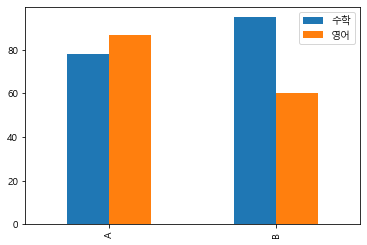

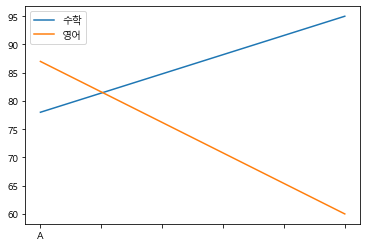

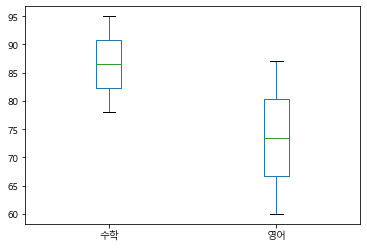

In [8]:
df.plot.bar()
df.plot.line()
df.plot.box()

----
#### iris dataset을 이용한 산포도 그리기
  - 데이타 마이닝 수업의 단골 손님인 iris 데이타를 이용
    - sklearn package에서 load하여 사용
----

In [9]:
from sklearn import datasets

In [10]:
# sklearn package에서 내장된 sample dataset 알아보기
# 36번에 iris가 보는 군요.(classification용 sample 자료)
for i, attr in enumerate(dir(datasets)):
    if attr[0] == 'l' and attr[1] == 'o':
        print(i, attr)

37 load_boston
38 load_breast_cancer
39 load_diabetes
40 load_digits
41 load_files
42 load_iris
43 load_linnerud
44 load_sample_image
45 load_sample_images
46 load_svmlight_file
47 load_svmlight_files
48 load_wine


In [11]:
from sklearn import datasets

data = datasets.load_iris()

In [12]:
# 도대체 번치 데이타란 무엇인가?
# 이것을 모르면 데이타 분석의 영계에 들어 갈 수가 없다.
type(data)

sklearn.utils.Bunch

#### Scikit-Learn의 샘플 데이터
  - sklearn.datasets 서브패키지는 모형 실습을 위한 예제 데이터 세트를 제공한다.

  - 예제 데이터 세트를 불러오는 명령들은 크게 다음과 같은 세가지 계열의 명령으로 나눌 수 있다.

    - load 계열 명령: 저장된 dataset import
    - fetch 계열 명령: 인터넷에서 캐쉬로 download 후 import
    - make 계열 명령: 가상 dataset을 생성
    - load 계열 명령
  - 예제 데이터 세트는 데이터 크기가 작은 것부터 큰 것까지 다양하다.   - scikit-learn 패키지는 작은 예제 데이터는 패키지 안에 포함하여 배포하고 크기가 큰 것들은 첫번째로 데이터를 불러들일때 인터넷에서 다운로드받아 저장해 놓았다가 불러온다.

  - load 계열의 명령들은 패키지에 처음부터 저장되어 다운로드 없이 바로 쓸 수 있는 것들이다.

    - load_boston(): 회귀 분석용 보스턴 집값
    - load_diabetes(): 회귀 분석용 당뇨병 자료
    - load_linnerud(): 회귀 분석용 linnerud 자료
    - load_iris(): classification용 iris 자료
    - load_digits(): classification용 숫자 필기 이미지 자료
    - load_wine(): classification용 포도주 등급 자료
    - load_breast_cancer(): classification용 유방암 진단 자료
    
  - fetch 계열의 명령들은 데이터의 크기가 커서 패키지에 처음부터 저장되어 있지 않고 인터넷에서 다운로드 받아 홈 디렉토리 아래의 scikit_learn_data 라는 서브 디렉토리에 저장한 후 추후 불러들이는 데이터들이다. 따라서 최초 사용시에 인터넷에 연결되어 있지 않으면 사용할 수 없다.

    - fetch_covtype() : 회귀분석용 토지 조사 자료
    - fetch_20newsgroups() : 뉴스 그룹 텍스트 자료
    - fetch_olivetti_faces() : 얼굴 이미지 자료
    - fetch_lfw_people() : 얼굴 이미지 자료
    - fetch_lfw_pairs() : 얼굴 이미지 자료
    - fetch_rcv1() : 로이터 뉴스 corpus
    - fetch_mldata() : ML 웹사이트에서 다운로드
    
  - make 계열 명령
  - 경우에 따라서는 모형을 시험하기 위해 원하는 특성을 가진 가상의 데이터가 필요할 수 있다. make 계열 명령은 이러한 가상 데이터를 생성하는 역할을 한다.

    - make_regression(): 회귀 분석용 가상 데이터 생성
    - make_classification(): 분류용 가상 데이터 생성
    - make_blobs(): 클러스터링용 가상 데이터 생성
    
  - 데이터 세트의 형식¶
  - scikit-learn의 대부분의 샘플 데이터는 `Bunch` 라는 클래스 객체로 생성된다. 이 클래스 객체는 다음과 같은 속성을 가진다.

    - data: (필수) 독립 변수 ndarray 배열
    - target: (필수) 종속 변수 ndarray 배열
    - feature_names: (옵션) 독립 변수 이름 리스트
    - target_names: (옵션) 종속 변수 이름 리스트
    - DESCR: (옵션) 자료에 대한 설명

In [13]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [14]:
from pprint import *
from sklearn import datasets
import numpy as np
import pandas as pd

iris_bunch = datasets.load_iris()

data = iris_bunch['data']
target = iris_bunch['target']
target_names = iris_bunch['target_names']
feature_names = iris_bunch['feature_names']

data = iris_bunch.data
target = iris_bunch.target
target_names = iris_bunch.target_names
feature_names = iris_bunch.feature_names

df_iris = pd.DataFrame(data=data, columns=feature_names)

In [15]:
print(target_names)

['setosa' 'versicolor' 'virginica']


In [16]:
pprint(feature_names)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']


In [17]:
data.shape

(150, 4)

In [18]:
target.shape

(150,)

In [19]:
data.dtype

dtype('float64')

In [20]:
type(data)

numpy.ndarray

In [21]:
type(iris_bunch)

sklearn.utils.Bunch

In [22]:
type(datasets.load_iris())

sklearn.utils.Bunch

In [23]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
df_iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [25]:
df_01 = df_iris.copy()

In [26]:
df_iris["target"] = target
# df_iris.loc[:, "target"] = target

In [27]:
df_iris.tail().shape

(5, 5)

----
#### 이제 scatter 함수로 산포도를 그려봅시다.
  - x축과 y축으로 사용할 column 명을 매개변수로 반드시 넣어야 합니다.

In [28]:
df_iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [29]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [30]:
target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<AxesSubplot:xlabel='sepal length (cm)', ylabel='target'>

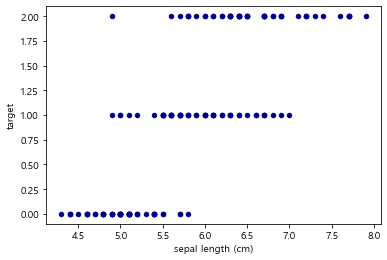

In [31]:
df_iris.plot.scatter(x=feature_names[0], y="target", c="darkblue")

##### target에 따라 색을 넣어 구분하는 color라는 column을 새로 만들어 봅시다.

In [32]:
df_iris.index

RangeIndex(start=0, stop=150, step=1)

In [33]:
for i in df_iris:
    print(i)

sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)
target


In [34]:
zero_target = df_iris[df_iris.target == 0].index
ones_target = df_iris[df_iris.target == 1].index
twos_traget = df_iris[df_iris.target == 2].index

In [35]:
df_iris.loc[zero_target, "color"] = "r"
df_iris.loc[ones_target, "color"] = "g"
df_iris.loc[twos_traget, "color"] = "b"

<AxesSubplot:xlabel='sepal length (cm)', ylabel='target'>

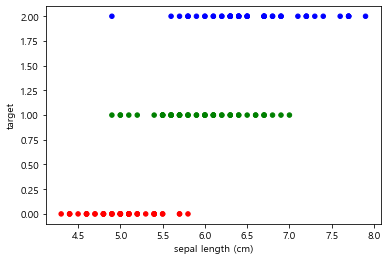

In [36]:
df_iris.plot.scatter(x=feature_names[0], y="target", 
                    c=df_iris.color)

____
##### 여러 종류의 그래프를 한 곳에 그리는 방법을 알아봅시다.

In [37]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

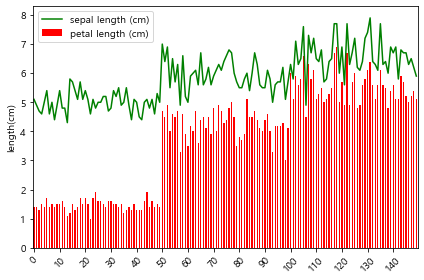

In [38]:
# plot method는 Axes라는 좌표축 객체를 반환
ax_01 = df_iris[feature_names[0]].plot.line(color="green")
ax_02 = df_iris[feature_names[2]].plot.bar(ax=ax_01, color="red")

# x측의 간격과 label name을 지정
ax_02.set_xticks(df_iris.index[0::10])
ax_02.set_xticklabels(df_iris.index[0::10], rotation=45)

# y축의 fkqp[f name을 지정
ax_02.set_ylabel("length(cm)")

# 범례를 지정하고 그림 layout을 tight하게 지정
ax_02.legend()
plt.tight_layout()
plt.show() # notebook에서는 없어도 되나 터미날 창에서 직접 명령을 줄 경우를 대비

____
#### 데이타 시각화가 필요한 이유
  - 앤스콤 4분할 그래프로 살펴보기
    - 데이타 시각화를 보여주는 전형적인 사례로 앤콤 4분할 그래프(Anscombe's quarter)가 있습니다. 프랭크 앤스콤이 데이타를 시각화하지 않고 수치만 확인할 때 발생할 수 있는 함정을 보여주기 위해 만든 그래프입니다. 그러면 앤스콤이 지적한 `"함정"`이란 무엇일까요?
____

   - 4개의 데이타 그룹은 각각 평균, 분산과 같은 수치값이나 상관관계, 회귀선이 같다는 특징이 있습니다.
   - 그래서 이런 결과만 보고 "데이타 그룹 I, II, III, IV의 데이터는 모두 같을 것이다."라고 착각할 수 있다는 것입니다.
   - 하지만 이를 시각화하면 데이타 그룹들이 서로 다른 데이타 패턴을 가지고 있다는 것을 금방 알수 있다는 것입니다.
   - 이런 점에서 데이타 시각화는 데이타 분석 분야에서 아주 중요한 요소라 할 수 있습니다.

In [39]:
import seaborn as sns

In [40]:
df_anscombe = sns.load_dataset("anscombe")
# https://github.com/mwaskom/seaborn-data (csv 파일)
# 위 사이트에서 seaborn으로 load_dataset 할 수는 데이타가 있습니다.
# csv 화일을 DataFrame으로 읽어 들였으니 내용을 확인해 봅시다.

In [41]:
df_anscombe.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [42]:
df_anscombe.columns

Index(['dataset', 'x', 'y'], dtype='object')

In [43]:
df_anscombe.index

RangeIndex(start=0, stop=44, step=1)

In [44]:
df_anscombe.head(2)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95


In [45]:
# dataset의 값이 어떤 것들로 구성되어 있는지 확인합니다.

df_anscombe.dataset.unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

In [46]:
# dataset이 4개의 유형(I, II, III, IV)으로 된 것을 쪼개봅니다.

df_I_anscombe   = df_anscombe[df_anscombe.dataset ==   "I"]
df_II_anscombe  = df_anscombe[df_anscombe.dataset ==  "II"]
df_III_anscombe = df_anscombe[df_anscombe.dataset == "III"]
df_IV_anscombe  = df_anscombe[df_anscombe.dataset ==  "IV"]

<AxesSubplot:>

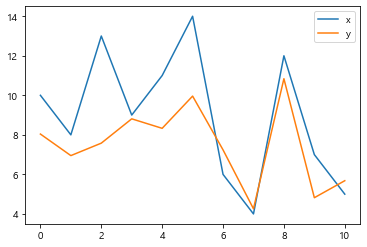

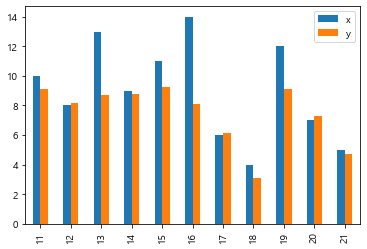

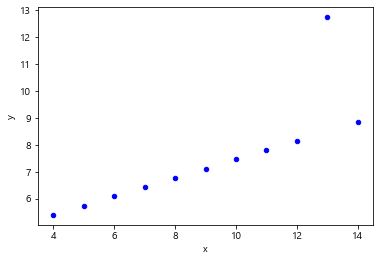

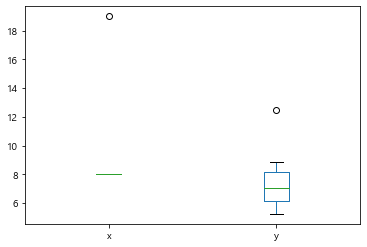

In [47]:
# line graph 부터 하나씩 확인해봅니다.

df_I_anscombe.plot.line()
df_II_anscombe.plot.bar()
df_III_anscombe.plot.scatter(x="x", y="y", c="b")
df_IV_anscombe.plot.box()

In [48]:
plot_method = [
     'bar',
     'barh',
     'box',
     'density',
     'hexbin',
     'hist',
     'kde',
     'line',
     'pie',
     'scatter']

In [49]:
# dir(df_I_anscombe.plot)으로 확인해서 함수만 따왔습니다.
plot_method # pandas.plot.bar 등으로  그릴 수 있는 그래프 종류입니다.

['bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

<AxesSubplot:ylabel='Density'>

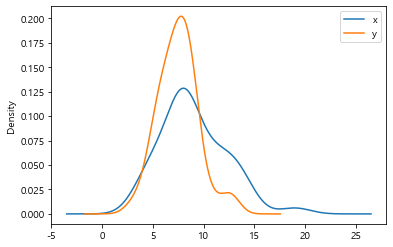

In [50]:
df_anscombe.plot.kde()

----
#### 하나의 figure에 4개의 axis를 그려 봅시다.
  - figure, subplot, axis, plot, show 순서입니다.
  - matplotlib.pyplot을 이용하였습니다.
----

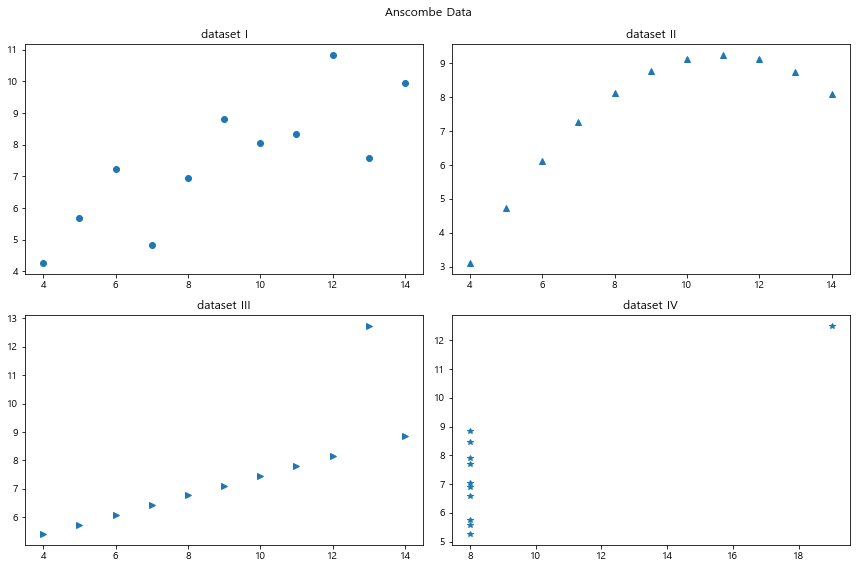

In [51]:
# 12 x 8 inch 캔버스를 장만합니다.
fig = plt.figure(figsize=[12,8])

# 캔버스 위에 2 by 2 subplot을 시계방향으로 4개 생성합니다.
axis_01 = fig.add_subplot(2,2,1)
axis_02 = fig.add_subplot(2,2,2)
axis_03 = fig.add_subplot(2,2,3)
axis_04 = fig.add_subplot(2,2,4)

# 4개의 축에 각각 시계방향으로 4개의 유형의 그래프를 그립니다. 
axis_01.plot(df_I_anscombe.x, df_I_anscombe.y, 'o')
axis_02.plot(df_II_anscombe.x, df_II_anscombe.y, '^')
axis_03.plot(df_III_anscombe.x, df_III_anscombe.y, '>')
axis_04.plot(df_IV_anscombe.x, df_IV_anscombe.y, '*')

# 4개의 축에 시계방향으로 4개의 타이틀을 삽입합니다. 
axis_01.set_title("dataset I")
axis_02.set_title("dataset II")
axis_03.set_title("dataset III")
axis_04.set_title("dataset IV")

# 캔버스 위에 제목을 삽입니다. 
fig.suptitle("Anscombe Data")
# 캔버스 위에 4개의 그래프 공간을 효율적으로 배치합니다.
fig.tight_layout()

# 이제 전체를 보여주는 명령을 내입니다.
fig
plt.show()

----
#### Pandas를 이용한 데이타 시각화 기초를 마무리합니다. 감사합니다.
----